# Machine Learning in Python - Workshop 2 (KEY)

## 1. Setup

### 1.1 Packages
In the cell below we will load the core libraries we will be using for this workshop and setting some sensible defaults for our plot size and resolution.

In [ ]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

### 1.2 Data

To begin, we will examine a simple data set on the size and weight of a number of books. These data come from the `allbacks` data set from the `DAAG` package in R. Our goal is to model the weight of a book using some combination of the other features in the data. The included columns are as follows:

* `volume` - book volumes in cubic centimeters
* `area` - hard board cover areas in square centimeters
* `weight` - book weights in grams
* `cover` - a factor with levels `"hb"` hardback, `"pb"` paperback

We read the data into python using pandas,

In [ ]:
books = pd.read_csv("daag_books.csv")
books

,volume,area,weight,cover
0,885,382,800,hb
1,1016,468,950,hb
2,1125,387,1050,hb
3,239,371,350,hb
4,701,371,750,hb
5,641,367,600,hb
6,1228,396,1075,hb
7,412,0,250,pb
8,953,0,700,pb
9,929,0,650,pb


---

### &diams; Exercise 1

Create a pairs plot of these data (make sure to include the `cover` column), describe any relationships you observe in the data.

/opt/venv/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


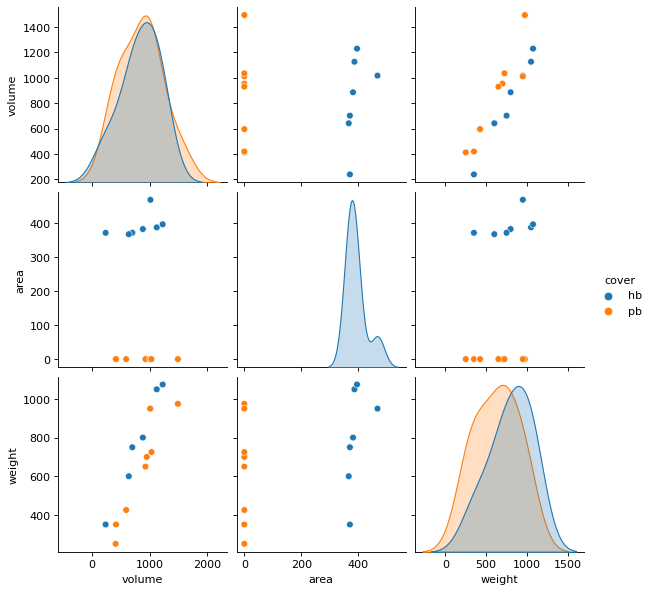

In [ ]:
sns.pairplot(data = books, hue = "cover")

Weight and volume seem to be linearly related for both types of books. Paperback books do not seem to have 
an area listed (all values are 0). Hardcover books seem to weigh more than paperback books.

---

## 1. Regression

We will begin by fitting a simple linear regression model for `weight` exclusively using `volume` as a feature in our model. 

---

### &diams; Exercise 2

Create a scatter plot of these data describe any apparent relationship between `weight` and `volume`.

<AxesSubplot:xlabel='volume', ylabel='weight'>

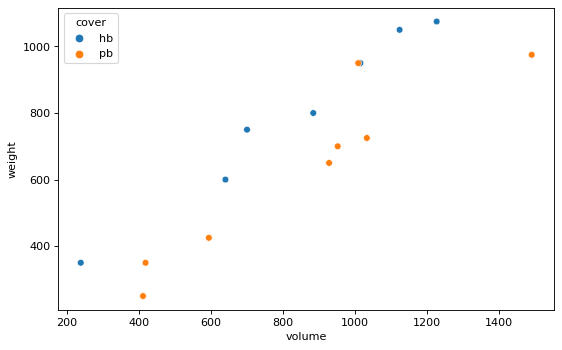

In [ ]:
sns.scatterplot(x="volume", y="weight", hue="cover", data=books)

---

### 1.1 Least Squares

In lecture we discussed how we can represent a regression problem using matrix notation and we can derive a solution using least squares. We can express this as,

$$
\underset{\boldsymbol{\beta}}{\text{argmin}} \,\, \lVert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \rVert^2 
= \underset{\boldsymbol{\beta}}{\text{argmin}} \,\, (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})^\top(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})
$$

where,

$$
\underset{n \times 1}{\boldsymbol{y}} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_{n-1} \\ y_n \end{pmatrix} 
\qquad
\underset{n \times 2}{\boldsymbol{X}} = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_{n-1} \\ 1 & x_n \\ \end{pmatrix}
\qquad 
\underset{2 \times 1}{\boldsymbol{\beta}} = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}
$$

The solution to this optimization problem is,

$$
\boldsymbol{\beta} = \left(\boldsymbol{X}^\top\boldsymbol{X}\right)^{-1} \boldsymbol{X}^\top\boldsymbol{y}
$$

In Python we can construct the model matrix `X` by combining a column of ones, for the intercept, with our observed `volume` values. Similarly, `y` is a column vector of the `weight` values. In both cases we construct these objects as numpy array objects.

In [ ]:
y = np.array(books.weight)
print(y)

[ 800  950 1050  350  750  600 1075  250  700  650  975  350  950  425
  725]


In [ ]:
X = np.c_[
    np.ones(len(y)),
    books.volume
]

print(X[:5])

[[1.000e+00 8.850e+02]
 [1.000e+00 1.016e+03]
 [1.000e+00 1.125e+03]
 [1.000e+00 2.390e+02]
 [1.000e+00 7.010e+02]]


Given the model matrix $(\boldsymbol{X})$ and observed outcomes $(\boldsymbol{y})$ we can then calculate the vector of solutions $(\boldsymbol{\beta})$ using numpy,

In [ ]:
from numpy.linalg import solve

beta = solve(X.T @ X, X.T @ y)
print(beta)

[107.67931061   0.70863714]


Note that when using numpy `@` performs  matrix multiplication while `*` performs elementwise multiplication between arrays. Numpy matrix multiplication can also be written using `A.dot(B)` or `np.matmul(A,B)`.

We can calculate predictions from this model by calculating $\hat{y} = \boldsymbol{X} \boldsymbol{\beta}$. 

---

### &diams; Exercise 3

Calculate these predicted book weights and store them in the origin `books` data frame in a column called `weight_ls_pred`. Print out the updated version of the data frame with this new column added.

In [ ]:
books["weight_ls_pred"] = X @ beta
books

,volume,area,weight,cover,weight_ls_pred
0,885,382,800,hb,734.823182
1,1016,468,950,hb,827.654648
2,1125,387,1050,hb,904.896097
3,239,371,350,hb,277.043588
4,701,371,750,hb,604.433948
5,641,367,600,hb,561.915720
6,1228,396,1075,hb,977.885723
7,412,0,250,pb,399.637814
8,953,0,700,pb,783.010508
9,929,0,650,pb,766.003217


---

Given the predictions we can create a plot showing the models fit by overlaying a line plot of the predictions on top of the original scatter plot.

<AxesSubplot:xlabel='volume', ylabel='weight'>

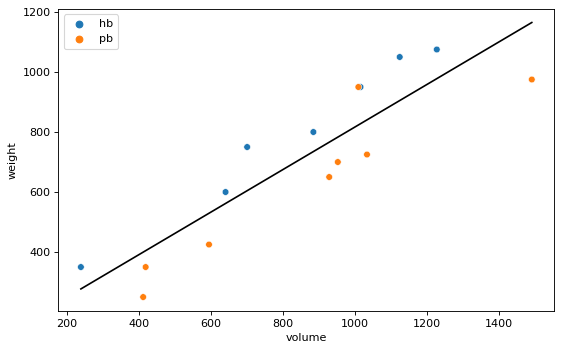

In [ ]:
sns.scatterplot(x="volume", y="weight", hue="cover", data=books)
sns.lineplot(x="volume", y="weight_ls_pred", color="black", data=books)

---

### 1.2 scikit-Learn

Constructing the model matrix by hand and calculating $\beta$ and model predictions using the least squares solution is less than ideal. As you might expect there are a number of higher level libraries that take care of many of these details. In this course we will be using the **scikit-learn** (**sklearn**) library to implement most of our machine learning models. As the semester progresses we will be learning about and implementing many different modeling methods. Additionally, we will also be learning how to use the larger data processing and workflow tools that are available in this library.

sklearn separates its various modeling tools into submodules organized by model type - for today we will be using the `LinearRegression` model from the `linear_model` submodule. Which we can import as follows,

In [ ]:
from sklearn.linear_model import LinearRegression

In general sklearn's models are implemented by first creating a model object, which is configured via constructor arguments, and then using that object to fit your data. As such, we will now create a linear regression model object `lr` and use it to fit our data. Once this object is created we use the `fit` method to obtain a model object fitted to our data. 

In [ ]:
lr = LinearRegression()
l = lr.fit(
    # X must be a matrix so we need to reshape the column
    X = np.array(books.volume).reshape(-1,1), 
    y = books.weight
)

This model object then has various useful methods and attributes, including `intercept_` and `coef_` which contain our estimates for $\beta$.

In [ ]:
b0 = l.intercept_
b1 = l.coef_[0]   # Subsetting here returns a scalar value
beta = (b0, b1)

print(beta)

(107.679310613766, 0.7086371433704164)


Using this default construction of `LinearRegression`, sklearn assumes that we have not included an intercept column (ones) in our model matrix and takes care of this for you. Additionally, since the intercept column is added the $\beta$ estimated for this particular column is stored separately, in the `intercept_` attribue.

I generally find this default behavior to be somewhat frustrating to work with, instead my preference is to handle all of the details of constructing the model matrix `X` myself and retrieving all `beta` values (including the intercept) from `coef_` directly. For example, if we use the `X` and `y` variables we defined for the least squares example above and construct the `LinearRegression` object using `fit_intercept=False` then,

In [ ]:
l = LinearRegression(fit_intercept=False).fit(X = X, y = y)
beta = l.coef_

print(beta)

[107.67931061   0.70863714]


Note that this is the same answers we obtained above.

The model fit objects also provide additional useful methods for evaluating the model (`score`) and calculating predictions (`predict`). Using the later we can add another column of predictions to our data frame.

In [ ]:
books["weight_sk_pred"] = l.predict(X)
books

,volume,area,weight,cover,weight_ls_pred,weight_sk_pred
0,885,382,800,hb,734.823182,734.823182
1,1016,468,950,hb,827.654648,827.654648
2,1125,387,1050,hb,904.896097,904.896097
3,239,371,350,hb,277.043588,277.043588
4,701,371,750,hb,604.433948,604.433948
5,641,367,600,hb,561.915720,561.915720
6,1228,396,1075,hb,977.885723,977.885723
7,412,0,250,pb,399.637814,399.637814
8,953,0,700,pb,783.010508,783.010508
9,929,0,650,pb,766.003217,766.003217


---

### &diams; Exercise 5

Do these results agree with the results we obtained when using the numpy least squares method?

*Yes, the results from the two methods are the same.*

---

### 1.3 Residuals

One of the most useful tools for evaluating a model is to examine the residuals of that model. For any standard regression model the residual for observation $i$ is defined as $y_i - \hat{y}_i$ where $\hat{y}_i$ is the model's predicted value for observation $i$. As mentioned previous, for the case of linear regression
$\hat{y} = \boldsymbol{X} \boldsymbol{\beta}$.

---

### &diams; Exercise 6

Calculate the residual for each observation and store it in a column named `resid`. Using this new column create a residual plot (scatter plot of `volume` vs `resid`) for this model. Color the points based on the `cover` type of each book. 

<AxesSubplot:xlabel='volume', ylabel='resid'>

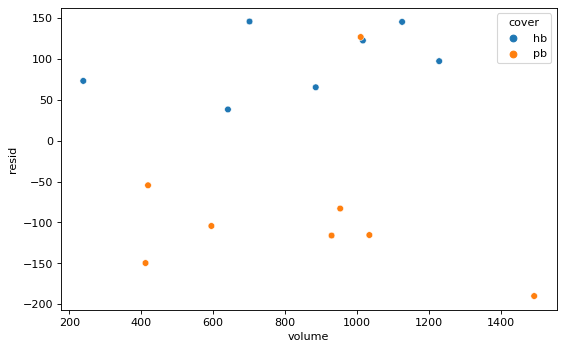

In [ ]:
books["resid"] = books.weight - books.weight_ls_pred
sns.scatterplot(x="volume", y="resid", hue="cover", data=books)

---

### &diams; Exercise 7

Are there any particular issues we should be concerned about with this model based on what you see in your residual plot?

*All of the paperback boooks have negative residuals (except for 1) and all of the hardcover books have positive residuals.*

---

## 2. Regression with Categorical Variables



### 2.1 Dummy Coding

Based on these results, it should be clear that it is important that our model include information about whether or not a book is a hardback or paperback. As such, we need a way of encoding this information into our modeling framework. To do this we need a way of converting our string / categorical variable into a numeric representation that can be included in our model matrix.

The most common approach for doing this is called dummy coding, in the case of a binary categorical variable it involves picking one of the two levels of the categorical variable and encoding it as 1 and the other level as 0. With Python we can accomplish this by comparing our categorical vector to the value of our choice and then casting (converting) the result to an integer type.

For example if we wanted to code `hb` as 1 and `pb` as 0 we would do the following,

In [ ]:
books["cover_hb"] = (books.cover == "hb").astype(int) # Returns either 0 or 1
books

,volume,area,weight,cover,weight_ls_pred,weight_sk_pred,resid,cover_hb
0,885,382,800,hb,734.823182,734.823182,65.176818,1
1,1016,468,950,hb,827.654648,827.654648,122.345352,1
2,1125,387,1050,hb,904.896097,904.896097,145.103903,1
3,239,371,350,hb,277.043588,277.043588,72.956412,1
4,701,371,750,hb,604.433948,604.433948,145.566052,1
5,641,367,600,hb,561.915720,561.915720,38.084280,1
6,1228,396,1075,hb,977.885723,977.885723,97.114277,1
7,412,0,250,pb,399.637814,399.637814,-149.637814,0
8,953,0,700,pb,783.010508,783.010508,-83.010508,0
9,929,0,650,pb,766.003217,766.003217,-116.003217,0


This is equivalent to using an indicator function in mathematical notation,

$$ 
\mathbb{1}_{hb_i} = 
\begin{cases}
1 & \text {if cover of book $i$ is hardback} \\
0 & \text {if cover of book $i$ is paperback}
\end{cases}
$$

Alternatively, we can defined the opposite of this where we code `hardback` as 0 and `paperback` as 1,


In [ ]:
books["cover_pb"] = (books.cover == "pb").astype(int) # Returns either 0 or 1
books

,volume,area,weight,cover,weight_ls_pred,weight_sk_pred,resid,cover_hb,cover_pb
0,885,382,800,hb,734.823182,734.823182,65.176818,1,0
1,1016,468,950,hb,827.654648,827.654648,122.345352,1,0
2,1125,387,1050,hb,904.896097,904.896097,145.103903,1,0
3,239,371,350,hb,277.043588,277.043588,72.956412,1,0
4,701,371,750,hb,604.433948,604.433948,145.566052,1,0
5,641,367,600,hb,561.915720,561.915720,38.084280,1,0
6,1228,396,1075,hb,977.885723,977.885723,97.114277,1,0
7,412,0,250,pb,399.637814,399.637814,-149.637814,0,1
8,953,0,700,pb,783.010508,783.010508,-83.010508,0,1
9,929,0,650,pb,766.003217,766.003217,-116.003217,0,1


Now that we have recoded our categorical variable, `cover`, into a numerical variable we can fit a standard regression model with the form,

$$ y_i = \beta_0 + \beta_1 \, x_i + \beta_2 \, \mathbb{1}_{hb_i} + \epsilon_i $$

which we can represent in matrix form using, $\boldsymbol{y} = \boldsymbol{X} \boldsymbol{\beta}$
where $\boldsymbol{X} = \big[ \boldsymbol{1},\, \boldsymbol{x},\, \boldsymbol{\mathbb{1}_{hb}} \big]$.

Using Python, we can use the concatenate function with our 1s column, the `volume` column, and our new dummy coded indicator column, `cover_hb`,

In [ ]:
X = np.c_[np.ones(len(y)), books.volume, books.cover_hb]
l = LinearRegression(fit_intercept=False).fit(X, books.weight)

beta = l.coef_

print(beta)

[ 13.91557219   0.71795374 184.04727138]


This gives us a regression equation of the form,

$$ 
y_i = 13.9 + 0.72 \, x_i + 184.0 \, \mathbb{1}_{hb_i} 
$$

which can be rewritten as two separate line equations (one for each case of `cover`),

$$
y_i = \begin{cases}
        13.9 + 0.72 \, x_i & \text{if book cover $i$ is paperback} \\
        (13.9 + 184.0) + 0.72 \, x_i & \text{if book cover $i$ is hardback} \\
       \end{cases}.
$$

We can calculate prediction points along those lines using the following Python code in which we hard code the possible values of $\boldsymbol{\mathbb{1}_{hb_i}}$

In [ ]:
books["weight_hb_pred"] = l.predict(X)
books

,volume,area,weight,cover,weight_ls_pred,weight_sk_pred,resid,cover_hb,cover_pb,weight_hb_pred
0,885,382,800,hb,734.823182,734.823182,65.176818,1,0,833.351907
1,1016,468,950,hb,827.654648,827.654648,122.345352,1,0,927.403847
2,1125,387,1050,hb,904.896097,904.896097,145.103903,1,0,1005.660805
3,239,371,350,hb,277.043588,277.043588,72.956412,1,0,369.553788
4,701,371,750,hb,604.433948,604.433948,145.566052,1,0,701.248418
5,641,367,600,hb,561.915720,561.915720,38.084280,1,0,658.171193
6,1228,396,1075,hb,977.885723,977.885723,97.114277,1,0,1079.610041
7,412,0,250,pb,399.637814,399.637814,-149.637814,0,1,309.712515
8,953,0,700,pb,783.010508,783.010508,-83.010508,0,1,698.125490
9,929,0,650,pb,766.003217,766.003217,-116.003217,0,1,680.894600


and we can then plot both of these lines along with the observed data.

<AxesSubplot:xlabel='volume', ylabel='weight'>

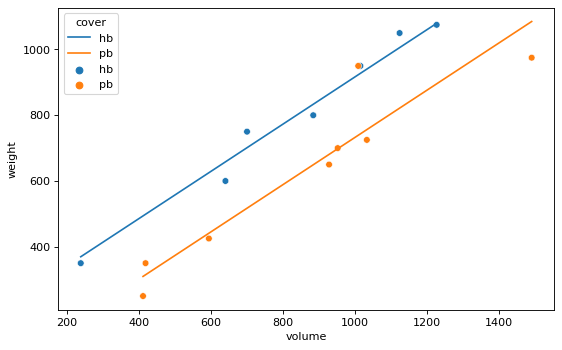

In [ ]:
sns.scatterplot(x="volume", y="weight", hue="cover", data=books)
sns.lineplot(x="volume", y="weight_hb_pred", hue="cover", data=books)

As well as create plot a residual plot of this new model,

<AxesSubplot:xlabel='volume', ylabel='resid_hb'>

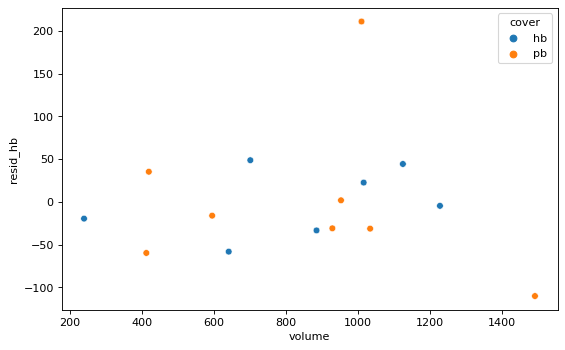

In [ ]:
books["resid_hb"] = books.weight - books.weight_hb_pred
sns.scatterplot(x="volume", y="resid_hb", hue="cover", data=books)

---

### &diams; Exercise 8

Based on these regression fits, do you think the model including the dummy coded `cover` variable produces a "better" model than our first regression model which did not include `cover`? Explain. 

*Fit is better (smaller sum of squares, smaller residuals) and no obvious structure in the residuals*

---

Note that by including a dummy variable in our model will change the interpretation of our regression coefficients. In this context,

* $\beta_0$ - This is the expected weight of a book with a `volume` of zero and a `hardback` indicator of zero, in other words a softcover book with zero volume.

* $\beta_1$ - This is the expected additional weight a book would have if its volume were to increase by 1 cm$^3$, all else being equal.

* $\beta_2$ - This is the expected additional weight a book would have if its hardcover indicator were to increase by 1, all else being equal. However, the hardcover indicator can only be 0 or 1 and hence this is the change in weight we would expect between a softcover book and a hardcover book with the same volume. In other words, hardcover books weight 184g more than softcover books.

Based on these interpretations we can see that the level that was coded as 0 (what is often called the reference level) gets folded into our intercept and the slope coefficient for the indicator provides the difference in intercept between the reference and the contrast level (level coded as 1).


---

### &diams; Exercise 9

Repeat the analysis above but this time fit a model using `pb` instead of `hb` in your model matrix. You should fit the new model as well as calculate the predictions for both paperback and hardback books.

In [ ]:
X = np.c_[
    np.ones(len(y)), 
    books.volume, 
    books.cover_pb
]
l = LinearRegression(fit_intercept=False).fit(X, books.weight)

beta = l.coef_

print(beta)

[ 197.96284357    0.71795374 -184.04727138]


---

### &diams; Exercise 10

What changed between the model with `cover_pb` vs the model with `cover_hb`? Specifically, comment on the values of $\beta_0$, $\beta_1$, and $\beta_2$ and their interpretations.


*$\beta_0$ and $\beta_2$ have changed but $\beta_1$ has stayed the same - the new values are related to the previous values (e.g. the new $\underset{new}{\beta_0} = \underset{prev}{\beta_0} + 
\underset{prev}{\beta_2}$).*

---

### 2.3 One hot encoding

Another common approach for transforming categorical variables is know as one hot encoding, in which all levels of the categorical variable are transformed into a new columns with values of 0 or 1. This is equivalent to what we have done manually above by including both `cover_hb` and `cover_pb`. This differs from dummy coding in that there is no longer a reference factor.

Pandas has a built-in method for performing this on categorical columns. This is easiest to see with a simple example, below we construct a data frame `df` with a single column that we transform into a one hot encoded version using panda's `get_dummies` method.

In [ ]:
df = pd.DataFrame({"col": ["A","B","C","A", np.nan]})
df

,col
0,A
1,B
2,C
3,A
4,NaN


In [ ]:
pd.get_dummies(df)

,col_A,col_B,col_C
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,0


We can also perform typical statistical dummy coding by using the `drop_first=True` argument, which excludes the first column as a reference level.

In [ ]:
pd.get_dummies(df, drop_first=True)

,col_B,col_C
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


Missing values can also be included as an additional category via the `dummy_na=True` argument. This treats missing values as an additional category for the provided factor.

In [ ]:
pd.get_dummies(df, dummy_na=True)

,col_A,col_B,col_C,col_nan
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1


We can now use this approach with sklearn's linear regression model to simplify the process of creating our model with both `volume` and `cover`. Using `get_dummies` on a clean copy of the `books` data frame automatically replaces the `cover` column with `cover_hb` and `cover_pb`, which should match the columns we created by hand above. 

In [ ]:
books = pd.read_csv("daag_books.csv") # Reread in the data for a clean copy
books = pd.get_dummies(books)
books

,volume,area,weight,cover_hb,cover_pb
0,885,382,800,1,0
1,1016,468,950,1,0
2,1125,387,1050,1,0
3,239,371,350,1,0
4,701,371,750,1,0
5,641,367,600,1,0
6,1228,396,1075,1,0
7,412,0,250,0,1
8,953,0,700,0,1
9,929,0,650,0,1


Note that `get_dummies` does not modify the underlying dataframe in place, and that it is necessary to save the result to a new variable (or overwrite the old version).

---

### 2.2 Least Squares & rank deficiency

Now lets consider the model where we naively include both `cover_hb` and `cover_pb` as well as an intercept column in our model matrix.

In [ ]:
X = np.c_[
    np.ones(len(y)), 
    books.volume, 
    books.cover_hb,
    books.cover_pb
]
l = LinearRegression(fit_intercept=False).fit(X, books.weight)


beta = l.coef_
print( beta )

[ 70.62613859   0.71795374 127.33670498 -56.7105664 ]


---

### &diams; Exercise 11

Write out the equations that predict weight for hardback and paperback books according to this model.  


$$
y_i = \begin{cases}
        70.6 + 0.72 \, x_i + 127.3 \times 0 -56.7 \times 1 = 13.9 + 0.72 \, x_i & \text{if book cover $i$ is paperback} \\
        70.6 + 0.72 \, x_i + 127.3 \times 1 -56.7 \times 0 = 197.9 + 0.72 \, x_i & \text{if book cover $i$ is hardback} \\
       \end{cases}.
$$

---

### &diams; Exercise 12

Are the solutions ($\beta$) given above unique? Can you find different values of $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ that would give you the same regression equations you wrote out in the previous exercise?

*This solution is not unique, anything of the form $\beta_0 + \beta_2 = a$ and $\beta_0 + \beta_3 = b$ will work.*

---

### &diams; Exercise 13

Solve for $\beta$ using the numpy approach mentioned in Section 1. Do the solutions differ from sklearn's solutions? Do they make sense? Explain.

In [ ]:
y = np.array(books.weight)
X = np.c_[
    np.ones(len(y)), 
    books.volume, 
    books.cover_hb,
    books.cover_pb
]

beta = solve(X.T @ X, X.T @ y)

print(beta)

[-120.20456982    0.71795374  318.16741339  134.12014201]


When using solve, we do get a solution for $\beta$ that differs from our previous values but does produce an equivalent solution
(this an be confirmed by calculating $\beta_0+\beta_2$ and $\beta_0+\beta_2$). However, if instead of using `solve` we had tried
to directly find the inverse with `inv`, the solution we obtain is completely incorrect.

In [ ]:
from numpy.linalg import inv
inv(X.T @ X) @ X.T @ y

array([1.38437500e+03, 7.01606597e-01, 2.62500000e+02, 5.93750000e+01])

*These values do not make sense and produce poor predictions, check by calculating `X @ beta`.*

---

The issues we are seeing with the above approaches are occuring due to colinearity between our predictors - if you examine the data it should be clear that given any two of the intercept, `cover_hb`, and `cover_pb` it is possible to exactly determine the value of the other column. Mathematically, we describe this as these columns are linearly depenedent, which implies that our model matrix is *rank deficient*. You can check this explicitly by via the `numpy.linalg.matrix_rank` function which will report that `X` (and $\boldsymbol{X}^\top\boldsymbol{X}$) are of rank 3 not 4 which is what we might have naievely expected.

This is important as the underlying linear algrebra methods used to solve for $\beta$ for a least squares problem often implicitly assume that $\boldsymbol{X}^\top\boldsymbol{X}$ is full rank in order to solve the matrix inverse and violating these assumptions can have unexpected results.

---

## 3. Competing the worksheet

At this point you have hopefully been able to complete all the preceeding exercises. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF and turn it in on gradescope under the `mlp-week02` assignment.

In [ ]:
!jupyter nbconvert --to pdf mlp-week02.ipynb

[NbConvertApp] Converting notebook mlp-week02.ipynb to pdf
[NbConvertApp] Support files will be in mlp-week02_files/
[NbConvertApp] Making directory ./mlp-week02_files
[NbConvertApp] Making directory ./mlp-week02_files
[NbConvertApp] Making directory ./mlp-week02_files
[NbConvertApp] Making directory ./mlp-week02_files
[NbConvertApp] Writing 91882 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 178089 bytes to mlp-week02.pdf
